## ルンゲ・クッタ法による放物問題
オイラー法に比べて少ない計算量で高い精度でシミュレーションできます。ルンゲ・クッタ法については以下の記事でわかりやすく説明されています。理論班の方にはぜひ読んでいただきたいと思います。https://chemical-engineering-review.com/runge-kutta/ 

### シミュレーションの大切さ
物理屋は運動方程式を立てるのに専念すべきであり, 運動方程式を解くのはプログラムに投げるのが良いです。(普通には解けないものも多々ありますし...)

### 放物問題について
１つ目に解くのが以下の運動方程式です。
$$
\begin{align}
m\frac{d^2x}{dt^2}&=0\\
m\frac{d^2y}{dt^2}&=-mg
\end{align}
$$

最初だけはルンゲ・クッタ法を自力で実装します。普通はscipyを使うのが良いでしょう。

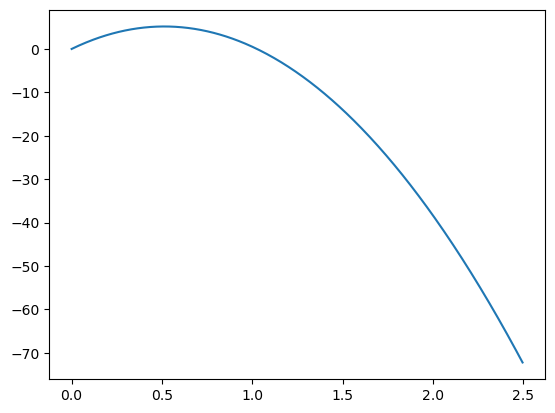

In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#定数たち
T=5
n=500
h=T/n
t = np.arange(0,T,h)
m = 1
G = 9.8

#yの関数
f = lambda t,y : -G

#Runge-Kutta法
v = np.zeros(n)
y = np.zeros(n)
x = np.zeros(n)
u = np.zeros(n)
x[0] = 0
u[0] = 0.5
y[0] = 0
v[0] = 10

for i in range(n-1):
    k1 = f(t[i],v[i])
    k2 = f(t[i]+h/2,v[i]+h*k1/2)
    k3 = f(t[i]+h/2,v[i]+h*k2/2)
    k4 = f(t[i]+h,v[i]+h*k3)
    v[i+1] = v[i]+h*(k1+2*k2+2*k3+k4)/6

    l1 = v[i]
    l2 = v[i]+h*l1/2
    l3 = v[i]+h*l2/2
    l4 = v[i]+h*l3
    y[i+1] = y[i]+h*(l1+2*l2+2*l3+l4)/6

#普通に考えて...
for i in range(n):
    x[i] = i*h*u[0]


plt.plot(x,y)
plt.show()

In [9]:
print(y)

[ 0.00000000e+00  0.00000000e+00 -1.64974874e-04 -4.96304926e-04
 -9.95382008e-04 -1.66360962e-03 -2.50240299e-03 -3.51318922e-03
 -4.69740731e-03 -6.05650834e-03 -7.59195550e-03 -9.30522423e-03
 -1.11978023e-02 -1.32711900e-02 -1.55269001e-02 -1.79664581e-02
 -2.05914020e-02 -2.34032831e-02 -2.64036654e-02 -2.95941260e-02
 -3.29762553e-02 -3.65516568e-02 -4.03219478e-02 -4.42887587e-02
 -4.84537337e-02 -5.28185310e-02 -5.73848223e-02 -6.21542935e-02
 -6.71286445e-02 -7.23095896e-02 -7.76988572e-02 -8.32981903e-02
 -8.91093466e-02 -9.51340982e-02 -1.01374232e-01 -1.07831551e-01
 -1.14507871e-01 -1.21405025e-01 -1.28524861e-01 -1.35869242e-01
 -1.43440046e-01 -1.51239168e-01 -1.59268518e-01 -1.67530022e-01
 -1.76025624e-01 -1.84757281e-01 -1.93726968e-01 -2.02936677e-01
 -2.12388417e-01 -2.22084212e-01 -2.32026104e-01 -2.42216152e-01
 -2.52656432e-01 -2.63349039e-01 -2.74296083e-01 -2.85499693e-01
 -2.96962015e-01 -3.08685215e-01 -3.20671475e-01 -3.32922996e-01
 -3.45441997e-01 -3.58230